In [88]:
#Importación de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from wordcloud import WordCloud

In [89]:
#Cargamos los dataset
credits = pd.read_csv (r'C:\Users\LENOVO\Documents\IA bootcamp ucamp\PROYECTOS FINALES\Movie Recommendation System\tmdb_5000_credits.csv')
movies = pd.read_csv (r'C:\Users\LENOVO\Documents\IA bootcamp ucamp\PROYECTOS FINALES\Movie Recommendation System\tmdb_5000_movies.csv')

In [90]:
#Análisis Exploratorio
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [91]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

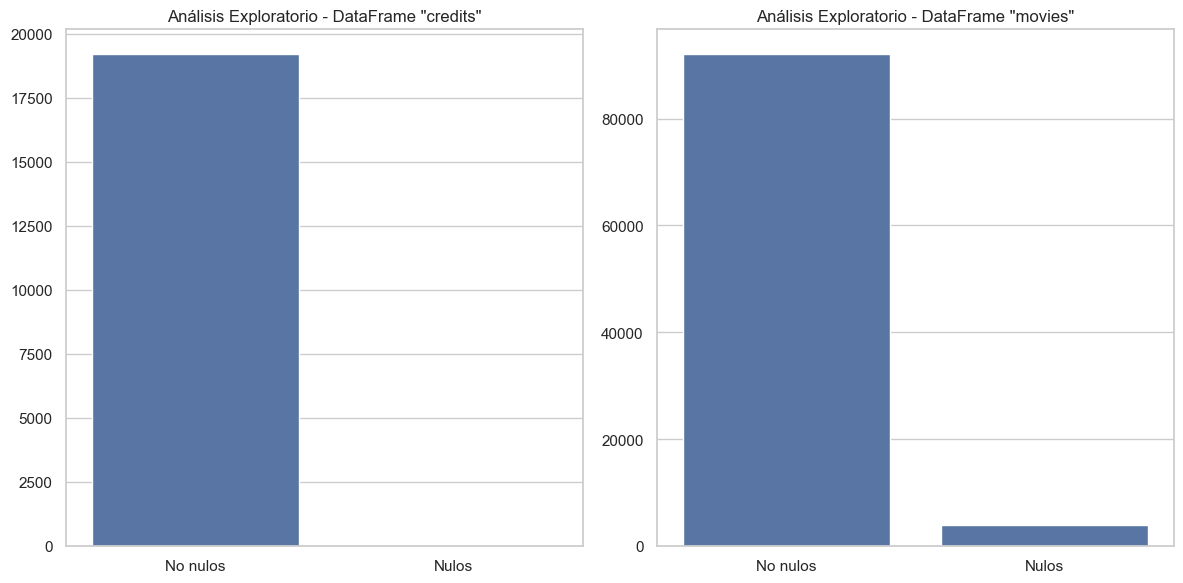

In [92]:
# Gráficos de análisis exploratorio
plt.figure(figsize=(12, 6))

# Gráfico de barras para mostrar la cantidad de datos no nulos en el dataframe 'credits'
plt.subplot(1, 2, 1)
sns.barplot(x=['No nulos', 'Nulos'], y=[credits.count().sum(), credits.isnull().sum().sum()])
plt.title('Análisis Exploratorio - DataFrame "credits"')

# Gráfico de barras para mostrar la cantidad de datos no nulos en el dataframe 'movies'
plt.subplot(1, 2, 2)
sns.barplot(x=['No nulos', 'Nulos'], y=[movies.count().sum(), movies.isnull().sum().sum()])
plt.title('Análisis Exploratorio - DataFrame "movies"')

plt.tight_layout()
plt.show()
#Este código creará un gráfico de barras para cada dataframe que muestra la cantidad de datos no nulos frente a los datos nulos en cada uno. Asegúrate de tener los archivos CSV adecuados en tu directorio de trabajo y ajusta las rutas de acceso si es necesario.


In [93]:
# Combina los datasets por 'id'
credits.columns = ['id','tittle','cast','crew']
movies= movies.merge(credits,on='id')

In [94]:
#Confirmación de la combinación del dataset
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [95]:
movies.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [96]:

# Rellenar los valores nulos en la columna 'overview' con una cadena vacía
movies['overview'] = movies['overview'].fillna('')

In [97]:
# Crea una instancia de TfidfVectorizer para convertir el texto en características numéricas
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(movies['overview'])

In [98]:
# Rellenar los valores nulos en la columna 'overview' con una cadena vacía
movies['overview'] = movies['overview'].fillna('')

In [99]:
# Entrena el modelo KNN
knn_model = NearestNeighbors(n_neighbors=15, metric='cosine', algorithm='brute')
knn_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=15)

In [100]:
# Función para obtener recomendaciones basadas en contenido
def get_content_based_recommendations(movie_title, knn_model=knn_model, tfidf_vectorizer=tfidf_vectorizer, data=movies):
    # Encuentra el índice de la película que coincide con el título
    idx = data[data['title'] == movie_title].index[0]

    # Encuentra las películas más similares utilizando KNN
    distances, indices = knn_model.kneighbors(tfidf_matrix[idx], n_neighbors=11)  # Se obtienen 11 para excluir la película de entrada

    # Obtiene los índices de las películas similares
    movie_indices = indices[0][1:]

    # Devuelve las 10 películas recomendadas en forma de DataFrame
    recommended_movies = data.iloc[movie_indices[:10]][['title', 'overview']]
    return recommended_movies

# Ejemplo de uso de la función de recomendación
movie_title = "The Dark Knight"
recommended_movies_df = get_content_based_recommendations(movie_title)

# Muestra las películas recomendadas
print("Películas recomendadas para '{}':".format(movie_title))
print(recommended_movies_df)

Películas recomendadas para 'The Dark Knight':
                                        title  \
3                       The Dark Knight Rises   
428                            Batman Returns   
3854  Batman: The Dark Knight Returns, Part 2   
299                            Batman Forever   
1359                                   Batman   
119                             Batman Begins   
1181                                      JFK   
9          Batman v Superman: Dawn of Justice   
2507                                Slow Burn   
210                            Batman & Robin   

                                               overview  
3     Following the death of District Attorney Harve...  
428   Having defeated the Joker, Batman now faces th...  
3854  Batman has stopped the reign of terror that Th...  
299   The Dark Knight of Gotham City confronts a das...  
1359  The Dark Knight of Gotham City begins his war ...  
119   Driven by tragedy, billionaire Bruce Wayne ded...  
1181  N

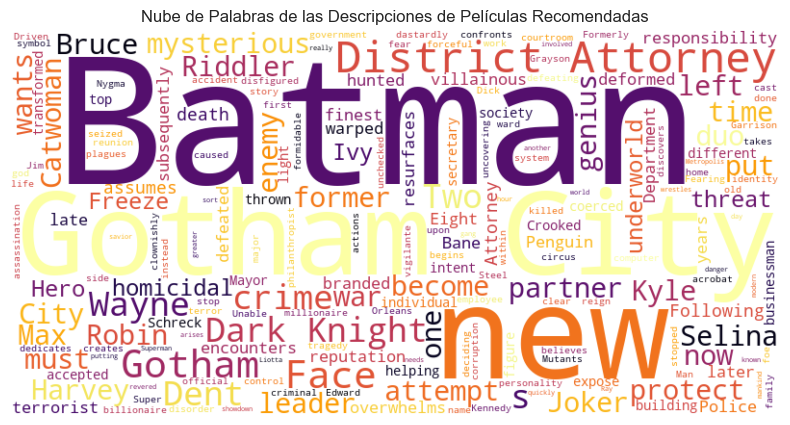

In [101]:
import matplotlib.pyplot as plt

# Ejemplo de uso de la función de recomendación
movie_title = "The Dark Knight"
recommended_movies_df = get_content_based_recommendations(movie_title)

# Concatenar las descripciones de las películas recomendadas
descriptions = " ".join(recommended_movies_df['overview'])

# Crear una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='inferno').generate(descriptions)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de las Descripciones de Películas Recomendadas")
plt.show()

In [102]:
#Mostrar 5 casos distintos con sus resultados para distintas peliculas
#Lista de títulos de películas para los ejemplos

movie_titles = ["The Dark Knight", "Inception", "Forrest Gump", "Avatar", "The Shawshank Redemption"]

# Itera a través de los títulos y muestra las recomendaciones
for movie_title in movie_titles:
    recommended_movies_df = get_content_based_recommendations(movie_title)
    print("Películas recomendadas para '{}':".format(movie_title))
    print(recommended_movies_df)
    print("-" * 50)


Películas recomendadas para 'The Dark Knight':
                                        title  \
3                       The Dark Knight Rises   
428                            Batman Returns   
3854  Batman: The Dark Knight Returns, Part 2   
299                            Batman Forever   
1359                                   Batman   
119                             Batman Begins   
1181                                      JFK   
9          Batman v Superman: Dawn of Justice   
2507                                Slow Burn   
210                            Batman & Robin   

                                               overview  
3     Following the death of District Attorney Harve...  
428   Having defeated the Joker, Batman now faces th...  
3854  Batman has stopped the reign of terror that Th...  
299   The Dark Knight of Gotham City confronts a das...  
1359  The Dark Knight of Gotham City begins his war ...  
119   Driven by tragedy, billionaire Bruce Wayne ded...  
1181  N

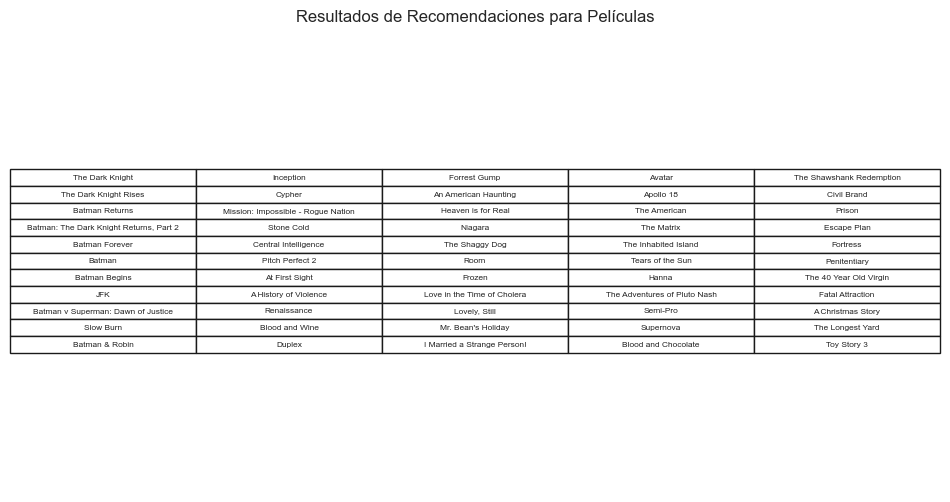

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de títulos de películas para los ejemplos
movie_titles = ["The Dark Knight", "Inception", "Forrest Gump", "Avatar", "The Shawshank Redemption"]

# Crear un diccionario para almacenar los resultados
results = {}

# Iterar a través de los títulos y obtener las recomendaciones
for movie_title in movie_titles:
    recommended_movies_df = get_content_based_recommendations(movie_title)
    results[movie_title] = recommended_movies_df['title'].tolist()

# Crear un DataFrame a partir del diccionario de resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados en una tabla
plt.figure(figsize=(12, 6))
ax = plt.gca()
ax.axis('off')
plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center')
plt.title("Resultados de Recomendaciones para Películas")
plt.show()